# 1

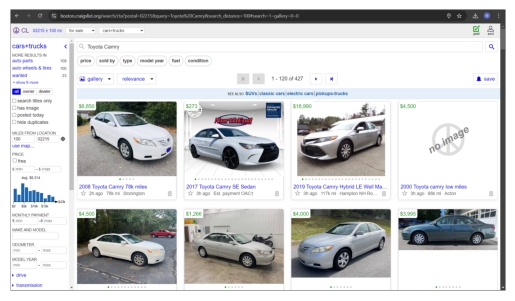

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Toyota camry.png')

plt.imshow(img)
plt.axis('off')  
plt.show()

# 2 , 3

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Base URL for Craigslist search for "Toyota Camry"
url = "https://boston.craigslist.org/search/cta?postal=02215&query=Toyota%20Camry&search_distance=100"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Lists to store the data
descriptions = []
prices = []
locations = []
years = []

# Loop through the first 5 pages
for page_number in range(5):
    # Add pagination parameter to the URL
    paginated_url = f"{url}&s={page_number * 120}"

    # Fetch the Craigslist page
    response = requests.get(paginated_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')S

    # Find all the listings on the current page
    listings = soup.find_all('li', class_='cl-static-search-result')

    # Break if no listings are found
    if not listings:
        break

    # Extract data from each listing
    for listing in listings:
        # Extract the description
        title_tag = listing.find('div', class_='title')
        title = title_tag.text.strip() if title_tag else 'Unknown'
        
        # Extract the price
        price_tag = listing.find('div', class_='price')
        price = price_tag.text.strip().replace('$', '').replace(',', '') if price_tag else np.nan
        
        # Extract the location
        location_tag = listing.find('div', class_='location')
        location = location_tag.text.strip() if location_tag else 'Unknown'
        
        # Extract the year from the description
        year = None
        for word in title.split():
            if word.isdigit():
                if len(word) == 4:  # 4-digit year
                    year = word
                    break
                elif len(word) == 2:  # 2-digit year
                    # Convert 2-digit year to 4-digit year
                    if int(word) >= 50:  # Assume years >= 50 are from the 1900s
                        year = '19' + word
                    else:  # Assume years < 50 are from the 2000s
                        year = '20' + word
                    break
        
        # Only append data if the title contains "Camry" to ensure it's the correct car
        if "Camry" in title:
            descriptions.append(title)
            prices.append(price)
            locations.append(location)
            years.append(year if year else 'null')

# Create a DataFrame
df = pd.DataFrame({
    'Description': descriptions,
    'Location': locations,
    'Price': pd.to_numeric(prices, errors='coerce'),
    'Year': pd.to_numeric(years, errors='coerce')  # Convert 'Year' to numeric
})

# Filter out rows where the 'Year' is less than 1982
df = df[df['Year'] >= 1982].copy()

# Convert 'Year' column to integer to remove decimal places
df['Year'] = df['Year'].astype(int)

# Print the DataFrame
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  
print(df.to_string(index=False))


                                                           Description                                  Location  Price  Year
                                        2018 Toyota Camry LE 4dr Sedan                                   Unknown  15995  2018
                                  2009 Toyota Camry great gas mileage!                                   Raymond   6200  2009
                                              2018 Toyota Camry XLE V6                             + Aleksa Auto  23995  2018
                          2003 Toyota Camry LE Sedan Low Miles! $4,990                                   Halifax   4990  2003
2004 Toyota Camry XLE Parts or Repair**4 Cylinder needs a headgasket**                                 Haverhill    500  2004
                                      99 Toyota Camry for parts or run                             South Windsor    700  1999
                                           2008 Toyota Camry 78k miles                                Stonington   685

# 4,5

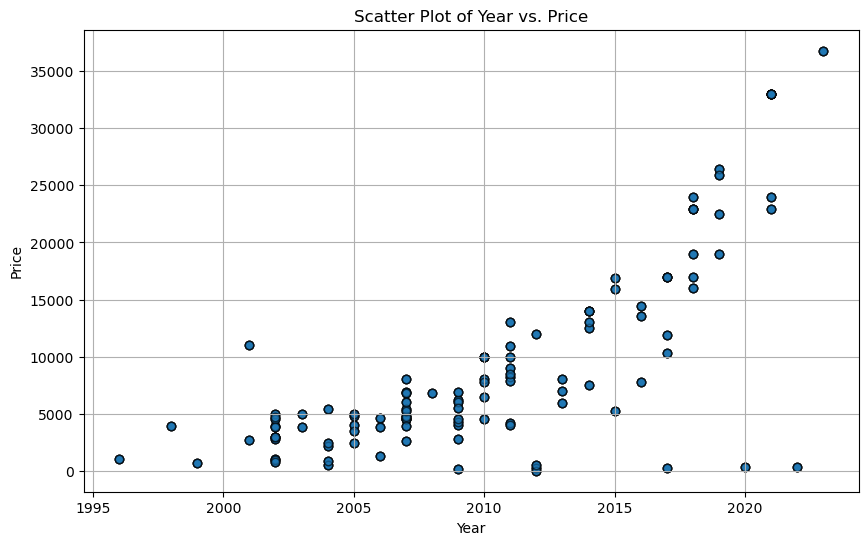

In [7]:
# Replace missing values in "Year" with the median
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
median_year = df['Year'].median()
df.loc[:, 'Year'] = df['Year'].fillna(median_year)  

# Convert the "Year" column to an integer to remove decimal points
df['Year'] = df['Year'].astype(int)

# Plot the scatter plot for "Year" vs. "Price"
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'], alpha=0.6, edgecolor='k')
plt.title('Scatter Plot of Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# 6

In [9]:
# Calculate the Pearson Correlation between "Year" and "Price"
pearson_corr = df['Year'].corr(df['Price'])
print(f'Pearson Correlation between Year and Price: {pearson_corr:.2f}')

Pearson Correlation between Year and Price: 0.73
